In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv('spam.tsv', sep='\t')

In [226]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [227]:
len(df)

5572

In [228]:
df.shape

(5572, 4)

In [229]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

###  Balance this data

In [230]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [231]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [232]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [233]:
#making same size ham and spam
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [234]:
data = ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,Yes..gauti and sehwag out of odi series.,40,3
1,ham,Saw Guys and Dolls last night with Patrick Swa...,62,0
2,ham,Am I the only one who doesn't stalk profiles?,45,2
3,ham,The whole car appreciated the last two! Dad an...,130,3
4,ham,Thanks for picking up the trash.,32,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


### Exploratory Data Analysis

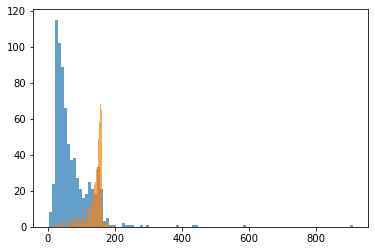

In [235]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

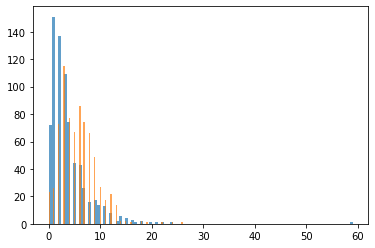

In [236]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

### Data Preparation

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [238]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [239]:
data.head()

,label,message,length,punct
0,ham,Yes..gauti and sehwag out of odi series.,40,3
1,ham,Saw Guys and Dolls last night with Patrick Swa...,62,0
2,ham,Am I the only one who doesn't stalk profiles?,45,2
3,ham,The whole car appreciated the last two! Dad an...,130,3
4,ham,Thanks for picking up the trash.,32,1


In [240]:
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3, random_state=0,shuffle=True, stratify=data['label'])

 ### Bag of Words Creation

In [241]:
vectorizer = TfidfVectorizer()

In [242]:
X_train_vect = vectorizer.fit_transform(X_train)

In [243]:
X_train_vect.shape  

(1045, 3729)

In [244]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742                             How much is torch in 9ja.
477     Its ok..come to my home it vl nice to meet and...
542                          Good Morning plz call me sir
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312                      No calls..messages..missed calls
268     Can you please ask macho what his price range ...
272                   No prob. I will send to your email.
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

### Pipeline and RF

In [245]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100, n_jobs = -1))])

In [246]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [247]:
y_pred = clf.predict(X_test)

In [248]:
confusion_matrix(y_test, y_pred)

array([[225,   0],
       [ 24, 200]], dtype=int64)

In [249]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.89      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [250]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [251]:
clf.predict(["Hi, this is Raushan"])

array(['ham'], dtype=object)

In [252]:
clf.predict(["Hey, free winner. you won money"])

array(['ham'], dtype=object)

In [253]:
clf.predict(["congratulations!, you have won free tickets to the USA this summer. 'TEXT WON' to 445566"])

array(['spam'], dtype=object)

In [254]:
clf.predict(["Hi, 'TEXT WON' to 445566'"])

array(['spam'], dtype=object)

 ### SVM

In [255]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf', SVC(C=2000 , gamma= 'auto'))])

In [256]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=2000, gamma='auto'))])

In [257]:
y_pred = clf.predict(X_test)

In [258]:
confusion_matrix(y_test, y_pred)

array([[220,   5],
       [ 17, 207]], dtype=int64)

In [259]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       225
        spam       0.98      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [260]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [261]:
clf.predict(["Hi, this is Raushan"])

array(['ham'], dtype=object)

In [262]:
clf.predict(["Hey, free winner. you won money"])

array(['spam'], dtype=object)

In [263]:
clf.predict(["congratulations!, you have won free tickets to the USA this summer. 'TEXT WON' to 445566"])

array(['spam'], dtype=object)

In [264]:
clf.predict(["Hi, 'TEXT WON' to 445566'"])

array(['spam'], dtype=object)